# Proplem  Description
* Customers Segmentation based on their Credit Card usage bhaviour  so , need to develop a customer segmentation to define marketing strategy.
*  Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

### About DataSet 

CUSTID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases (

BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFFPURCHASES : Maximum purchase amount done in one-go

INSTALLMENTSPURCHASES : Amount of purchase done in installment

CASHADVANCE : Cash in advance given by the user

PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASESTRX : Numbe of purchase transactions made

CREDITLIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

In [35]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score


In [9]:
PATH = 'CC GENERAL.csv'

In [10]:
data =pd.read_csv(PATH)

In [11]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [13]:
data.shape

(8950, 18)

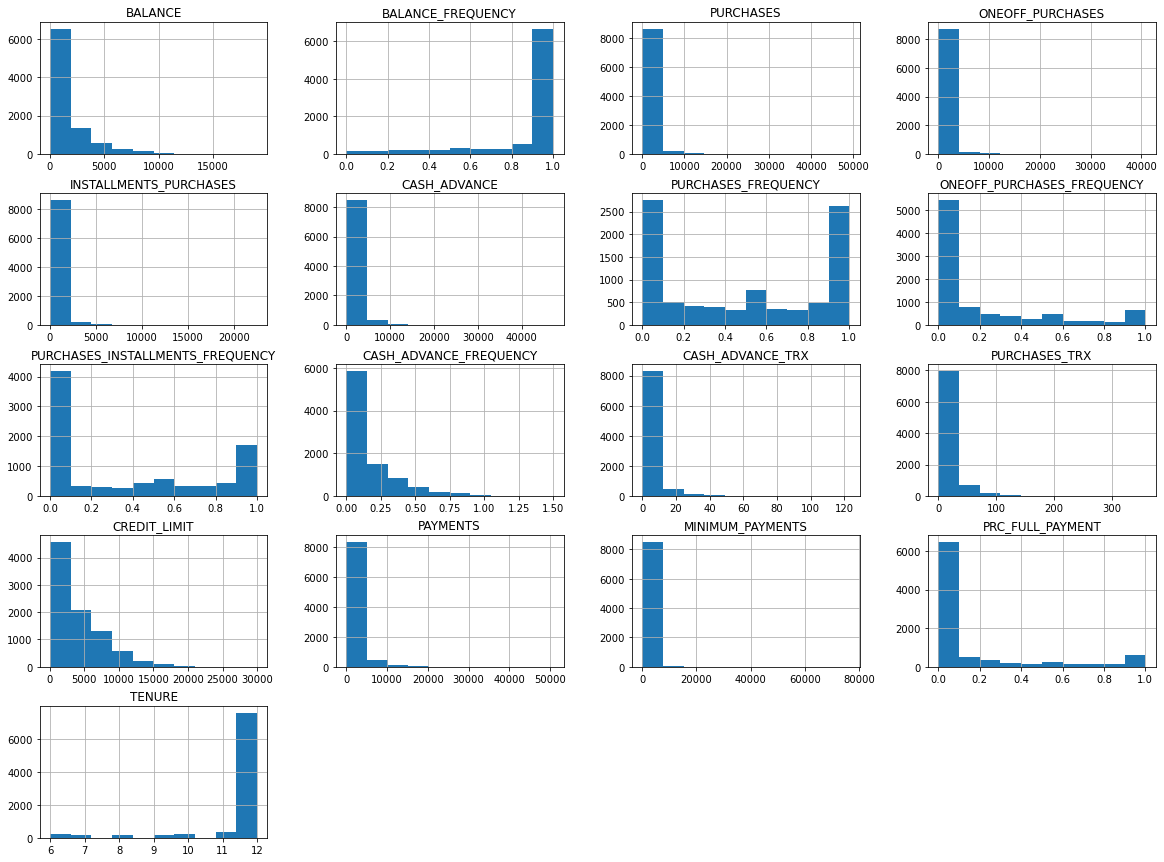

In [ ]:
data.hist(figsize=(20,15))
plt.show()

## Data Preprocessing

### Descriptive Statistics of Data



In [14]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


* From these results it seems that data have outliers 
* -- But I think that it is normal to have extreme values ​​ as the difference in customer categories.

### Dealing with Missing Values


In [15]:
data.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

* Great There are not much misssing values


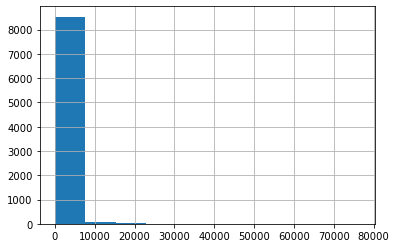

In [16]:
data['MINIMUM_PAYMENTS'].hist()


* values of MINIMUM_PAYMENTS feature are in skewed distribution so median imputation is good in this case  

In [17]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median() , inplace =True )


In [19]:
# handling missing values with mean
#credit limit  has only 1 record  with missing value. So we don't have to take the trouble to impute it. We can  drop it.
data.dropna(subset=['CREDIT_LIMIT'], inplace=True)


In [20]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Dropping unimportant Features

In [21]:
# Customer ID act as an index of data , so i drop it  as it Not useful for training
data.drop(['CUST_ID'], axis=1, inplace=True)

### Correlation among Features

In [23]:
correlation = data.corr()
correlation

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322335,0.181230,0.164326,0.126437,0.496679,-0.078054,0.073114,-0.063267,0.449246,0.385139,0.154297,0.531283,0.322769,0.397906,-0.319018,0.072421
BALANCE_FREQUENCY,0.322335,1.000000,0.133586,0.104257,0.124204,0.099312,0.229440,0.202295,0.175869,0.192022,0.141516,0.189527,0.095843,0.064842,0.131128,-0.095308,0.118566
PURCHASES,0.181230,0.133586,1.000000,0.916844,0.679889,-0.051495,0.392991,0.498413,0.315537,-0.120137,-0.067194,0.689552,0.356963,0.603252,0.095772,0.180356,0.086155
ONEOFF_PURCHASES,0.164326,0.104257,0.916844,1.000000,0.330610,-0.031341,0.264913,0.524881,0.127699,-0.082622,-0.046226,0.545514,0.319724,0.567283,0.050243,0.132745,0.064047
INSTALLMENTS_PURCHASES,0.126437,0.124204,0.679889,0.330610,1.000000,-0.064264,0.442398,0.214016,0.511334,-0.132312,-0.074017,0.628097,0.256499,0.384066,0.134003,0.182548,0.086016
CASH_ADVANCE,0.496679,0.099312,-0.051495,-0.031341,-0.064264,1.000000,-0.215579,-0.086786,-0.177118,0.628535,0.656493,-0.075877,0.303985,0.453226,0.140735,-0.152961,-0.068552
PURCHASES_FREQUENCY,-0.078054,0.229440,0.392991,0.264913,0.442398,-0.215579,1.000000,0.501305,0.862921,-0.308483,-0.203541,0.568408,0.119788,0.103393,0.006106,0.305761,0.061006
ONEOFF_PURCHASES_FREQUENCY,0.073114,0.202295,0.498413,0.524881,0.214016,-0.086786,0.501305,1.000000,0.142270,-0.111707,-0.069116,0.544849,0.295038,0.243503,-0.027339,0.157497,0.082234
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063267,0.175869,0.315537,0.127699,0.511334,-0.177118,0.862921,0.142270,1.000000,-0.262955,-0.169250,0.529949,0.060755,0.085496,0.032021,0.250049,0.072926
CASH_ADVANCE_FREQUENCY,0.449246,0.192022,-0.120137,-0.082622,-0.132312,0.628535,-0.308483,-0.111707,-0.262955,1.000000,0.799573,-0.131161,0.132616,0.183206,0.100624,-0.249768,-0.133427


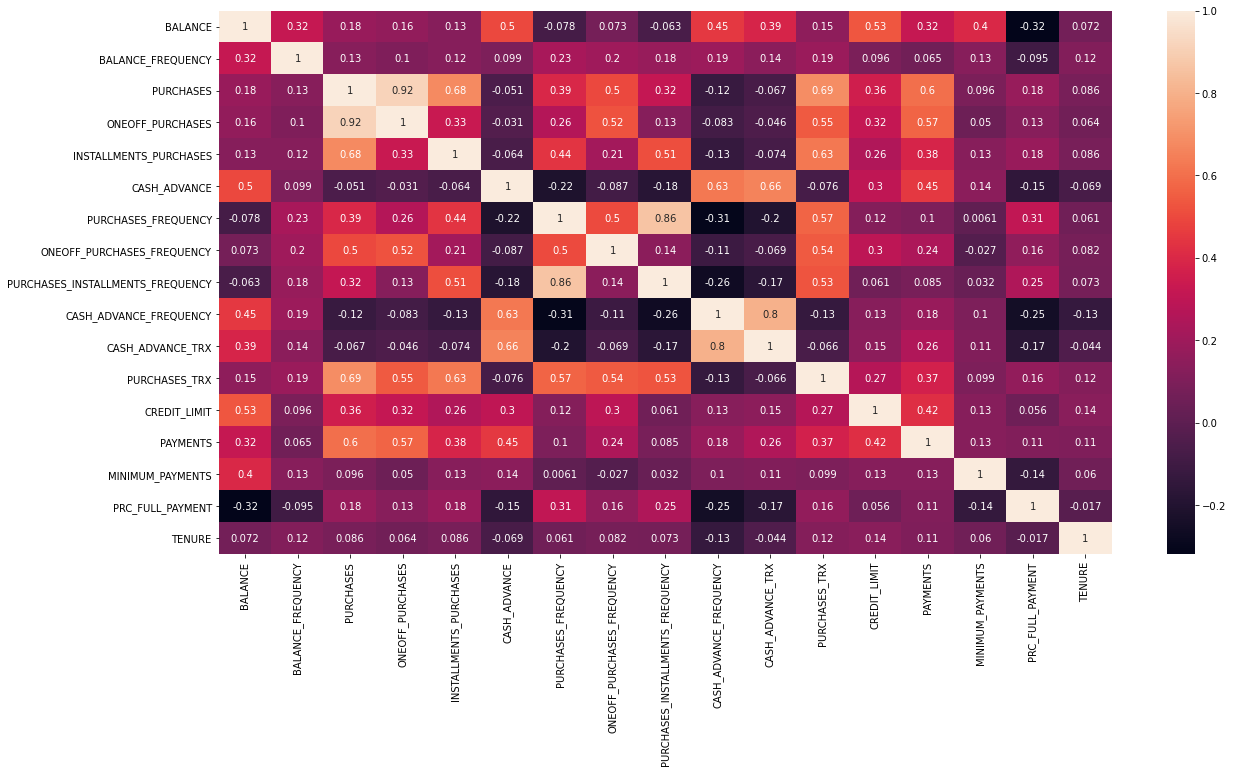

In [28]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot = True)



In [33]:
# See the most correlated Features 
np.abs(correlation>0.5).sum().sort_values(ascending = False)

PURCHASES_TRX                       7
PURCHASES                           5
ONEOFF_PURCHASES                    5
PURCHASES_INSTALLMENTS_FREQUENCY    4
INSTALLMENTS_PURCHASES              4
PURCHASES_FREQUENCY                 4
ONEOFF_PURCHASES_FREQUENCY          4
CASH_ADVANCE                        3
PAYMENTS                            3
CASH_ADVANCE_FREQUENCY              3
CASH_ADVANCE_TRX                    3
CREDIT_LIMIT                        2
BALANCE                             2
BALANCE_FREQUENCY                   1
MINIMUM_PAYMENTS                    1
PRC_FULL_PAYMENT                    1
TENURE                              1
dtype: int64

* PURCHASES_TRX  is highly correlated with features                      

### Normalize data 

In [139]:
#Normalize data
scaler = Normalizer()
data_scaled_Normalized = scaler.fit_transform(data)
type(data_scaled_standard)



numpy.ndarray

## Apply PCA 

#### Choosing PCA

In [142]:
pca = PCA()
pca.fit(data_scaled_Normalized)
pca.explained_variance_ratio_.cumsum()

array([0.33473261, 0.61275455, 0.77709597, 0.86338479, 0.93736654,
       0.98866095, 0.99992569, 0.99995938, 0.99998224, 0.99999601,
       0.99999982, 0.99999991, 0.99999995, 0.99999998, 0.99999999,
       1.        , 1.        , 1.        ])

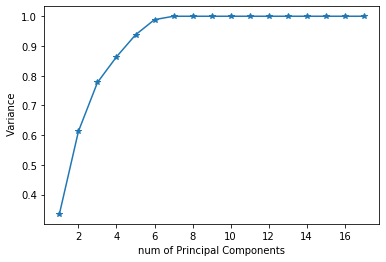

In [40]:

plt.plot(range(1, 18), pca.explained_variance_ratio_.cumsum() , marker='*' )
plt.xlabel('num of Principal Components')
plt.ylabel(' Variance')
plt.show()

* After applying PCA on normalize data 
It is clear that the first 6 or 4 component
represent high variance of data . 

#### Try clustering with 6 component 

In [41]:
_pca= PCA(n_components=6)
principal_comp1=_pca.fit_transform(data_scaled_Normalized)
data_PCA1=pd.DataFrame(data=principal_comp1,columns=['Component 1', 'Component 2' , "Component 3" , "Component 4"  ,
                                                    "Component 5" , "Component 6" ]  )
data_PCA1.head()

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6
0,-0.315278,-0.041853,0.027771,0.139956,-0.007188,0.005130
1,0.318472,-0.160774,0.365690,-0.042644,0.058604,0.017430
2,-0.207088,-0.180932,-0.127302,-0.067849,-0.067244,-0.057543
3,-0.291821,-0.113327,-0.113621,-0.154754,0.053492,-0.093352
4,0.142317,-0.090828,-0.100230,0.069802,-0.313978,-0.029277


In [42]:
data_PCA1.shape

(8949, 6)

# Clustering With Different Tecniques 

# **KMEANS**

## Elbow Method 

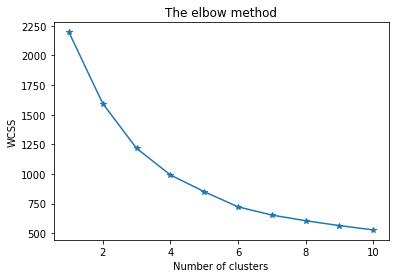

In [53]:
from sklearn.cluster import KMeans
wcss = []

for i in range( 1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data_PCA1)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1,11), wcss , marker='*')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

### **Silhouette Score**




In [45]:
#test for the best accuracy 

from sklearn.metrics import silhouette_score
acc=[]
for n_clusters in range(2,12):
    cluster= KMeans(n_clusters =n_clusters)
    cluster_labels = cluster.fit_predict(data_PCA1)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_score(data_PCA1, cluster.labels_))
    acc.append(silhouette_score(data_PCA1, cluster.labels_))
accuracy=max(acc)
print("\n higest accuracy is : ",accuracy)



For n_clusters = 2 The average silhouette_score is : 0.3023984711502971
For n_clusters = 3 The average silhouette_score is : 0.3312842373325365
For n_clusters = 4 The average silhouette_score is : 0.3528781414002703
For n_clusters = 5 The average silhouette_score is : 0.3699275291781245
For n_clusters = 6 The average silhouette_score is : 0.3706316495628436
For n_clusters = 7 The average silhouette_score is : 0.3356342949745777
For n_clusters = 8 The average silhouette_score is : 0.31316668096951766
For n_clusters = 9 The average silhouette_score is : 0.3587192347147451
For n_clusters = 10 The average silhouette_score is : 0.3061497482699286
For n_clusters = 11 The average silhouette_score is : 0.3111815742223081

 higest accuracy is :  0.3706316495628436


#### Try with 4 componentes

In [77]:
_pca_2= PCA(n_components=4)
principal_comp2=_pca_2.fit_transform(data_scaled_Normalized)
data_PCA2=pd.DataFrame(data=principal_comp2,columns=['Component 1', 'Component 2' , "Component 3" , "Component 4" , 
                                                     ] )
data_PCA2.head()

#  Note i tried with 5 component as it capture more than 98% of data but the higest accuracy  is :  0.39238891
# so i tried with 4 , has more accuracy than 5 

,Component 1,Component 2,Component 3,Component 4
0,-0.315278,-0.041853,0.027771,0.139956
1,0.318472,-0.160774,0.365690,-0.042644
2,-0.207088,-0.180932,-0.127302,-0.067849
3,-0.291821,-0.113327,-0.113621,-0.154754
4,0.142317,-0.090828,-0.100230,0.069802


###  **Elbow Method**

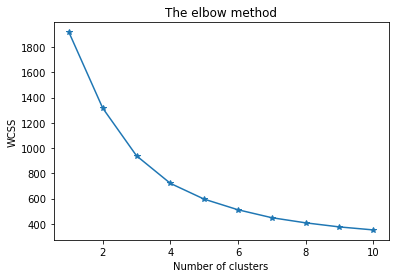

In [56]:
from sklearn.cluster import KMeans
wcss = []

for i in range( 1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data_PCA2)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1,11), wcss , marker='*')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [57]:
wcss

[1917.440474910237,
 1316.627827801379,
 939.1305626245008,
 720.9846197156465,
 596.0946057836537,
 511.93223282732976,
 449.12523868053864,
 408.50939764905934,
 376.14943055947504,
 352.48057118480585]

In [58]:
#test for the best accuracy 

from sklearn.metrics import silhouette_score
acc=[]
for n_clusters in range(2,12):
    cluster= KMeans(n_clusters =n_clusters)
    cluster_labels = cluster.fit_predict(data_PCA2)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_score(data_PCA2, cluster.labels_))
    acc.append(silhouette_score(data_PCA2, cluster.labels_))
accuracy=max(acc)
print("\n higest accuracy is : ",accuracy)



For n_clusters = 2 The average silhouette_score is : 0.338823363853801
For n_clusters = 3 The average silhouette_score is : 0.37588398090241887
For n_clusters = 4 The average silhouette_score is : 0.3971181348023102
For n_clusters = 5 The average silhouette_score is : 0.4096187002544156
For n_clusters = 6 The average silhouette_score is : 0.3979909977661994
For n_clusters = 7 The average silhouette_score is : 0.3485379170321643
For n_clusters = 8 The average silhouette_score is : 0.3509874981466606
For n_clusters = 9 The average silhouette_score is : 0.3519925345155322
For n_clusters = 10 The average silhouette_score is : 0.3469703736908143
For n_clusters = 11 The average silhouette_score is : 0.3456475659339251

 higest accuracy is :  0.4096187002544156


###  Now I choose 4 components for PCA and the higest score is in 5 clusters 

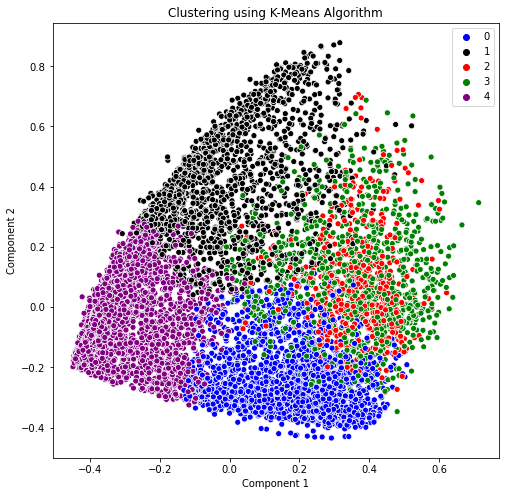

In [64]:
# apply kmeans algorithm
import seaborn as sns
kmeans_model=KMeans(5)
kmeans_model.fit_predict(data_PCA2)
plt.figure(figsize=(8,8))
#palette=['dodgerblue','red','green','blue','black','pink','gray','purple','coolwarm']
ax=sns.scatterplot(x="Component 1",y="Component 2",hue=kmeans_model.labels_,data=data_PCA2,palette=['blue','black','red','green','purple'])
plt.title("Clustering using K-Means Algorithm")

plt.show()

## HIERARCHICAL CLUSTERING


### **Dendrogram**

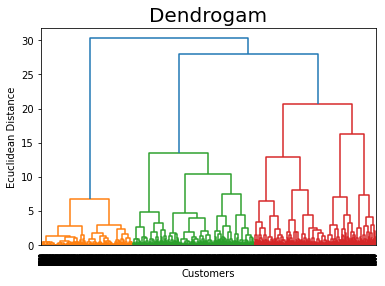

In [65]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(data_PCA2, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

### **Silhouette Score**

In [66]:
#test for the best accuracy '
from sklearn.cluster import AgglomerativeClustering
acc=[]
for n_clusters in range(2,11):
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(data_PCA2)
    silhouette_avg = silhouette_score(data_PCA2, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    acc.append(silhouette_avg)
accuracy=max(acc)
print("\n higest accuracy is : ",accuracy)



For n_clusters = 2 The average silhouette_score is : 0.2368586317798816
For n_clusters = 3 The average silhouette_score is : 0.30611741370431217
For n_clusters = 4 The average silhouette_score is : 0.3332935764476658
For n_clusters = 5 The average silhouette_score is : 0.3422688142946341
For n_clusters = 6 The average silhouette_score is : 0.31622718093269664
For n_clusters = 7 The average silhouette_score is : 0.29754124058677256
For n_clusters = 8 The average silhouette_score is : 0.3064649854913643
For n_clusters = 9 The average silhouette_score is : 0.3022480101218366
For n_clusters = 10 The average silhouette_score is : 0.29685861699456007

 higest accuracy is :  0.3422688142946341


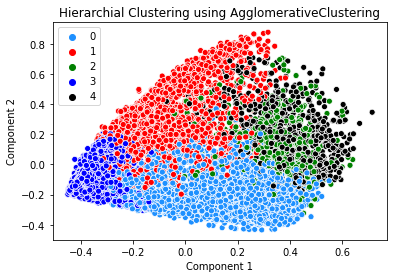

In [67]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
cluster_labels = model.fit_predict(data_PCA2)
plt.title(' Clustering', fontsize = 20)
ax=sns.scatterplot(x="Component 1",y="Component 2",hue=cluster_labels,data=data_PCA2,palette=['dodgerblue','red','green','blue','black'])
plt.title("Hierarchial Clustering using AgglomerativeClustering")
plt.show()


# **DBSCAN**

* with DBScan normalize data with StandardScaler to avoid lable 1 proplem and get high accuracy 

In [138]:
#Normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled_standard = scaler.fit_transform(data)
data_scaled_standard.shape



(8949, 18)

In [143]:
pca = PCA()
pca.fit(data_scaled_standard)
pca.explained_variance_ratio_.cumsum()

array([0.25780369, 0.44966303, 0.53291645, 0.60357849, 0.66244519,
       0.7180624 , 0.77222061, 0.81827342, 0.8588147 , 0.89469954,
       0.92378833, 0.94618724, 0.96293651, 0.97642279, 0.98791285,
       0.99747718, 0.99999935, 1.        ])

In [145]:
_pca= PCA(n_components=6)
principal_comp_DB=_pca.fit_transform(data_scaled_standard)
data_PCA_DB=pd.DataFrame(data=principal_comp_DB,columns=['Component 1', 'Component 2' , "Component 3" , "Component 4"  ,
                                                    "Component 5" , "Component 6" ]  )
data_PCA_DB.head()

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6
0,-1.683636,-1.072399,0.477060,0.677598,0.039061,0.003954
1,-1.134494,2.508871,0.602379,-0.111941,0.643774,-0.354651
2,0.969251,-0.383473,0.091270,1.231457,-2.168385,0.083309
3,-0.888236,0.004497,1.500356,1.068210,0.195044,-0.242688
4,-1.600110,-0.683885,0.349870,1.010630,-0.453348,0.078433


### **Silhouette Score**

In [147]:
silhouette_ = [] 
from sklearn import metrics

for eps in np.linspace(3,5,10):
    for n in range(8,13):
        model = DBSCAN(eps = eps, min_samples = n)  
        label = model.fit_predict(data_PCA_DB)
        n_clusters = np.unique(model.labels_)
        silhouette_avg = metrics.silhouette_score(data_PCA_DB, label,metric = 'euclidean')
        silhouette_.append((eps, n, silhouette_avg, n_clusters))
        print(  "silhouette_avg is " , silhouette_avg ,"with points =  ", n , "for eps = " , eps  )
max(silhouette_)

silhouette_avg is  0.7806679022255499 with points =   8 for eps =  3.0
silhouette_avg is  0.7806679022255499 with points =   9 for eps =  3.0
silhouette_avg is  0.7806679022255499 with points =   10 for eps =  3.0
silhouette_avg is  0.7791262257177086 with points =   11 for eps =  3.0
silhouette_avg is  0.7732635096696339 with points =   12 for eps =  3.0
silhouette_avg is  0.7877113961034092 with points =   8 for eps =  3.2222222222222223
silhouette_avg is  0.7860658294446349 with points =   9 for eps =  3.2222222222222223
silhouette_avg is  0.7833977235935841 with points =   10 for eps =  3.2222222222222223
silhouette_avg is  0.7833977235935841 with points =   11 for eps =  3.2222222222222223
silhouette_avg is  0.7833977235935841 with points =   12 for eps =  3.2222222222222223
silhouette_avg is  0.7978330704209962 with points =   8 for eps =  3.4444444444444446
silhouette_avg is  0.7978330704209962 with points =   9 for eps =  3.4444444444444446
silhouette_avg is  0.7934886012031512

(5.0, 12, 0.8298149753897354, array([-1,  0], dtype=int64))

* the higest acc is nearly 85% with points =   8 for eps =  5.0 

In [152]:
model = DBSCAN(eps = 5, min_samples = 8)  
label = model.fit_predict(data_PCA_DB)
n_clusters = np.unique(model.labels_)
silhouette_avg = metrics.silhouette_score(data_PCA_DB, label,metric = 'euclidean')
silhouette_avg

0.8478450621352843

In [153]:
no_clusters = len(np.unique(model.labels_) )
no_noise = np.sum(np.array(DBSCAN_labels) == -1, axis=0)
print('Estimated no. of clusters: ', no_clusters)
print('Estimated no. of noise points: ' ,   no_noise)

Estimated no. of clusters:  2
Estimated no. of noise points:  3401


In [159]:
no_clusters

2

In [ ]:
# # Remove the noise
# index=[i for i in range(0, len(data_PCA1)) if DBSCAN_labels[i] != -1]
# #Data without noise 
# new_data=data_PCA.iloc[index]
# new_data.head(2)

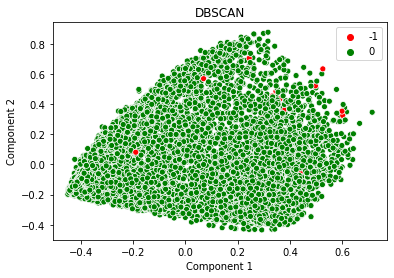

In [162]:

# d1 = np.array([d1[i] for i in range(0, range_max) if labels1[i] != -1])
# labels1 = np.array([DBSCAN_labels[i] for i in range(0, len(data_PCA1)) if DBSCAN_labels[i] != -1])


ax=sns.scatterplot(x="Component 1",y="Component 2",hue=model.labels_,data=data_PCA2,palette=['red','green'])
plt.title("DBSCAN" )
plt.show()

# **GMM**

### **Silhouette Score**

In [148]:
#test for the best accuracy '
from sklearn.mixture import GaussianMixture
acc=[]
for i in range(2,11):
    clusterer = GaussianMixture(n_components=i , covariance_type='full')
    clusterer.fit(data_PCA1)
    labels = clusterer.predict(data_PCA1)
    # cluster_labels = clusterer.fit_predict(d1)
    silhouette_avg = silhouette_score(data_PCA1, labels)
    print("For n_clusters =", i,
          "The average silhouette_score is :", silhouette_avg)
    acc.append(silhouette_avg)
accuracy=max(acc)
print("\n higest accuracy is : ",accuracy)



For n_clusters = 2 The average silhouette_score is : 0.18418648796348272
For n_clusters = 3 The average silhouette_score is : 0.1900871506430236
For n_clusters = 4 The average silhouette_score is : 0.14943882410107925
For n_clusters = 5 The average silhouette_score is : 0.0981388048818398
For n_clusters = 6 The average silhouette_score is : 0.08604091720218007
For n_clusters = 7 The average silhouette_score is : 0.07019058995465412
For n_clusters = 8 The average silhouette_score is : 0.057605956698638515
For n_clusters = 9 The average silhouette_score is : 0.05965338510815638
For n_clusters = 10 The average silhouette_score is : 0.060509084906526504

 higest accuracy is :  0.1900871506430236


In [164]:

gmm = GaussianMixture(n_components=3 , covariance_type='full')
gmm.fit(data_PCA1)

# predict the cluster for each data point
cluster_gmm = gmm.predict(data_PCA1)
#cluster_gmm 

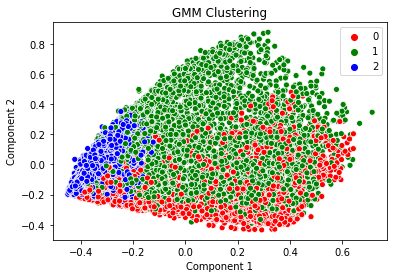

In [166]:
ax=sns.scatterplot(x="Component 1",y="Component 2",hue=cluster_gmm,data=data_PCA1,palette=['red','green' , "blue"])
plt.title('GMM Clustering')

plt.show()


## Summary 

* It seems The best segmentation of customers is 5 categories
* BDSACN is the best Algorithm in this case with 85% accuracy and comes after it Kmeans  with 40% accuracy 
* AgglomerativeClustering with 34% accuracy and GaussianMixture with 19% 

